In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/pizza_v2.csv')

Viewing the top 5 rows

In [ ]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


Checking the no.of rows and columns in the dataset

In [ ]:
df.shape

(129, 9)

Getting the information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


Checking the null values in the dataset

In [ ]:
df.isnull().sum()

,0
company,0
price_rupiah,0
diameter,0
topping,0
variant,0
size,0
extra_sauce,0
extra_cheese,0
extra_mushrooms,0


In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().any()

False

In [ ]:
df.dtypes

,0
company,object
price_rupiah,object
diameter,object
topping,object
variant,object
size,object
extra_sauce,object
extra_cheese,object
extra_mushrooms,object


In [ ]:
category_list=['company','topping','variant','size','extra_sauce','extra_cheese','extra_mushrooms']
for columns in category_list:
  df[columns]=df[columns].astype('category')

In [ ]:
df.rename(columns={'price_rupiah':'Price'},inplace=True)

In [ ]:
df

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [ ]:
df['Price']=df['Price'].str.replace('Rp','')
df['Price']=df['Price'].str.replace(',','').astype('int32')


In [ ]:
def convert(value):
  return value*0.0054

In [ ]:
df['Price']=df['Price'].apply(convert)

In [ ]:
df

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,210.6,8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,388.8,12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,534.6,14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,237.6,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [ ]:
df['diameter'] = df['diameter'].str.replace(' inch', '')
df['diameter'] = df['diameter'].str.replace(' ', '').astype(float)


In [ ]:
df.dtypes

,0
company,category
Price,float64
diameter,float64
topping,category
variant,category
size,category
extra_sauce,category
extra_cheese,category
extra_mushrooms,category


Getting overall summary statistics about the dataset

In [ ]:
df.describe()

,Price,diameter
count,127.000000,127.000000
mean,469.608661,12.913386
std,242.941941,3.258746
min,126.900000,8.000000
25%,270.000000,12.000000
50%,421.200000,12.000000
75%,567.000000,14.000000
max,1339.200000,22.000000


Univarient Analysis(Numerical data)

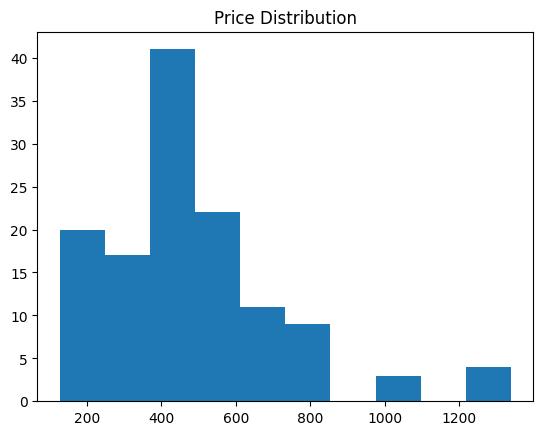

In [ ]:
plt.hist(x='Price',data=df)
plt.title('Price Distribution')
plt.show()


<Axes: xlabel='diameter', ylabel='count'>

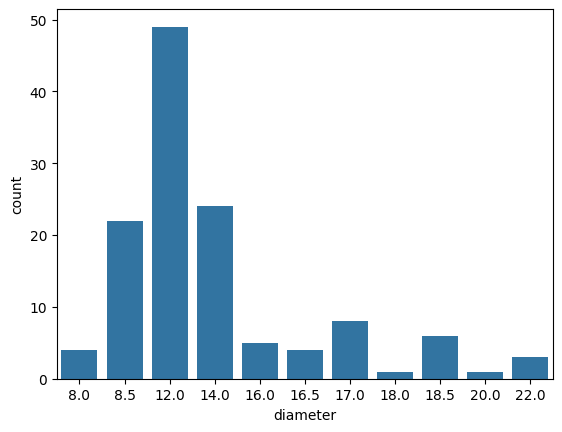

In [ ]:
sns.countplot(x=df['diameter'])

Categorical data

<Axes: xlabel='topping', ylabel='count'>

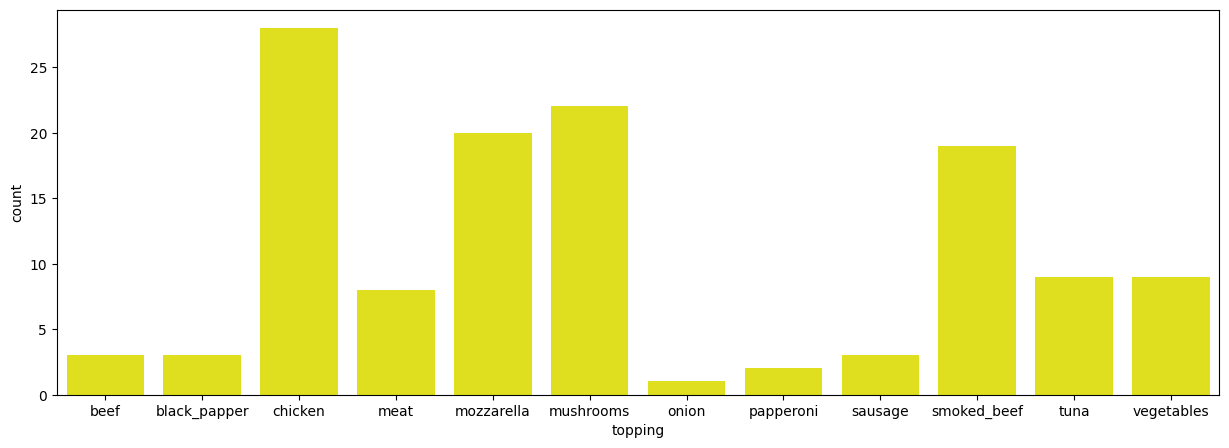

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['topping'],color='yellow')

<Axes: xlabel='variant', ylabel='count'>

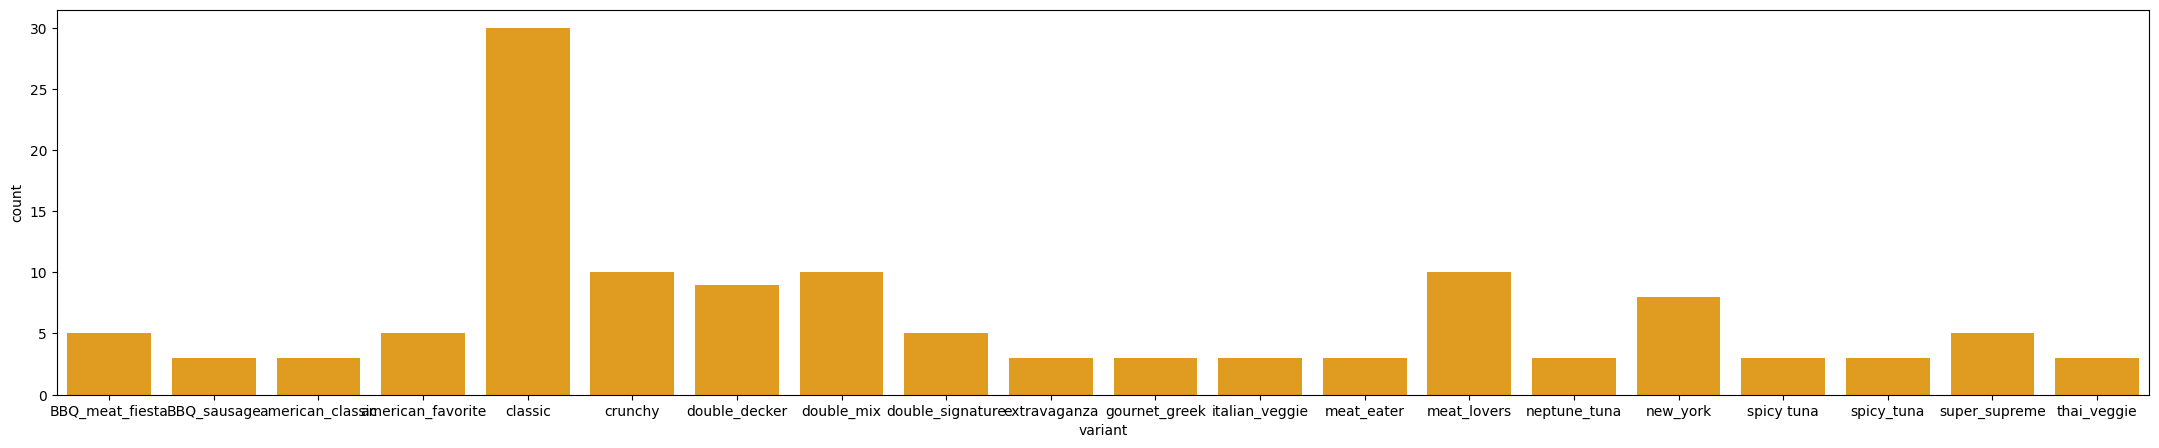

In [ ]:
plt.figure(figsize=(27,5))
sns.countplot(x=df['variant'],color='orange')

<Axes: xlabel='size', ylabel='count'>

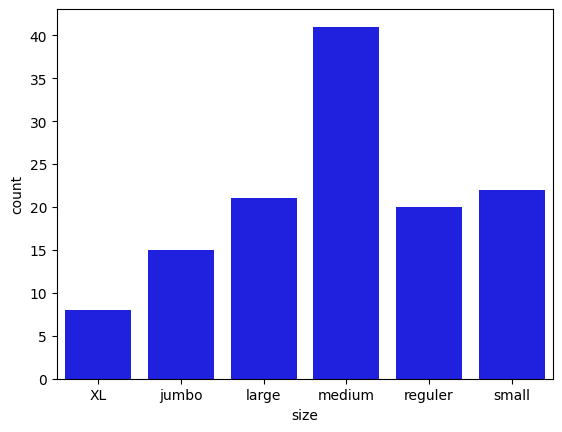

In [ ]:
sns.countplot(x=df['size'],color='blue')

<Axes: xlabel='extra_sauce', ylabel='count'>

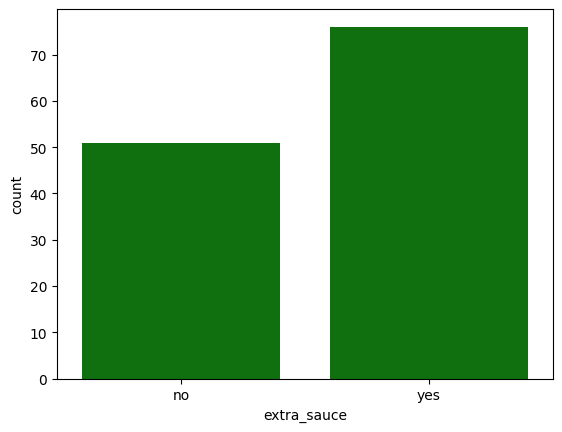

In [ ]:
sns.countplot(x=df['extra_sauce'],color='green')

<Axes: xlabel='extra_cheese', ylabel='count'>

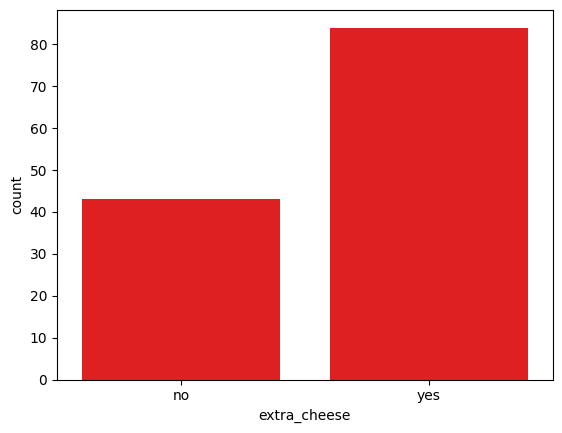

In [ ]:
sns.countplot(x=df['extra_cheese'],color='red')

<Axes: xlabel='extra_mushrooms', ylabel='count'>

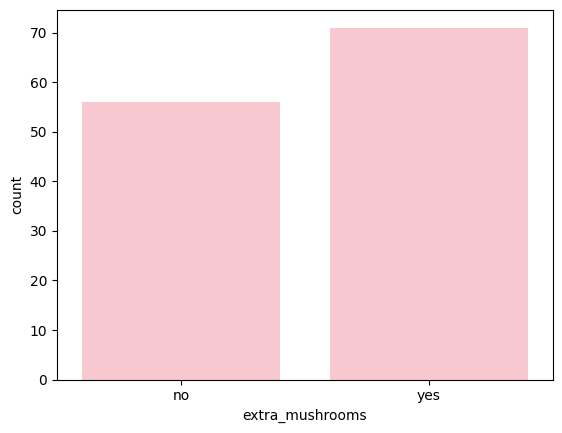

In [ ]:
sns.countplot(x=df['extra_mushrooms'],color='pink')

Bivarent Analysis (Numerical vs Numerical)

<Axes: xlabel='Price', ylabel='diameter'>

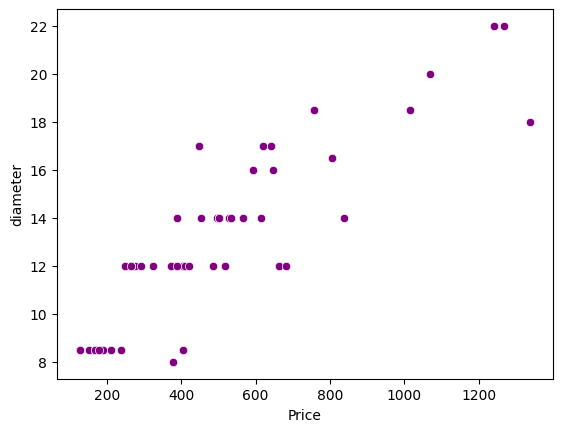

In [ ]:
sns.scatterplot(x='Price',y='diameter',data=df,color='purple')

Categorical vs Numerical data

<Axes: xlabel='company', ylabel='Price'>

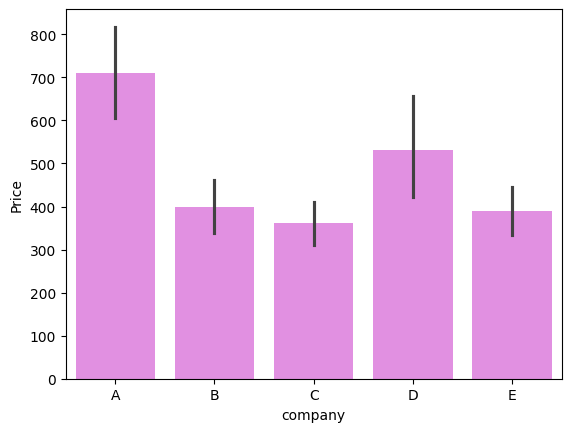

In [ ]:
sns.barplot(x='company',y='Price',data=df,color='violet')

<Axes: xlabel='topping', ylabel='Price'>

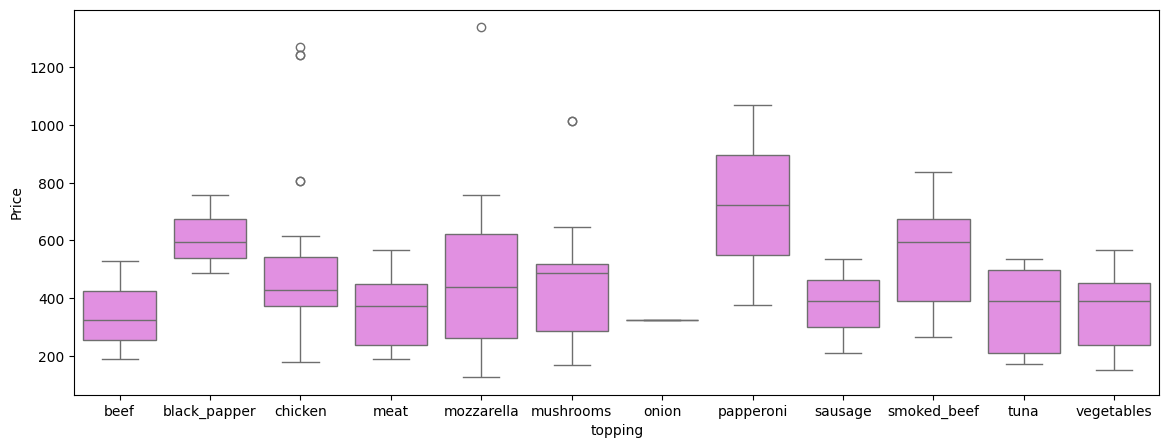

In [ ]:
plt.figure(figsize=(14,5))
sns.boxplot(x='topping',y='Price',data=df,color='violet')

**conclusion**:The papperoni pizza is more expensive than other pizza.

<Axes: xlabel='size', ylabel='Price'>

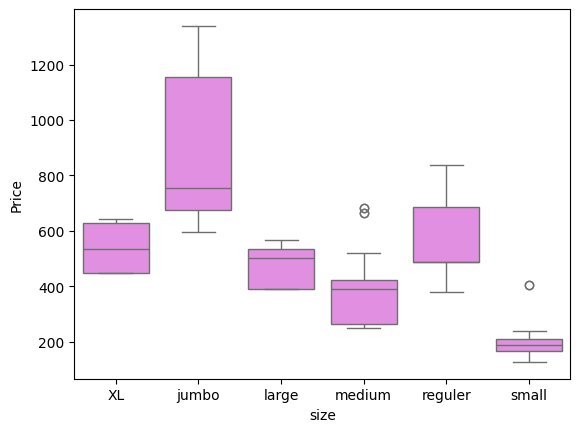

In [ ]:
sns.boxplot(x='size',y='Price',data=df,color='violet')

**conclusion:**The jumbo and reguler pizza is more expensive than other pizzas.

Finding the most expensive pizza

In [ ]:
df[df['Price'].max()==df['Price']]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


**conclusion:**The double_signature pizza is the most expensive pizza.

Finding the diameter of jumbo size pizza

In [ ]:
df[df['size']=='jumbo']['diameter'].head()

,diameter
0,22.0
1,20.0
4,18.0
5,18.5
6,16.0


Finding the diameter of XL size pizza

In [ ]:
df[df['size']=='XL']['diameter'].head()

,diameter
29,17.0
35,17.0
41,17.0
47,17.0
93,17.0


Removing the outliers

In [ ]:
df[(df['size']=='jumbo') & (df['diameter']<=16)]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [ ]:
df=df.drop(df.index[[6,11,16,80]])

In [ ]:
df[(df['size']=='jumbo') & (df['diameter']<=16)]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


Now the outliers are removed

Data Preprocessing

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
category_list=['company','topping','variant','size','extra_sauce','extra_cheese','extra_mushrooms']
for columns in category_list:
  df[columns]=le.fit_transform(df[columns])

In [ ]:
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [ ]:
correlation=df.corr()

<Axes: >

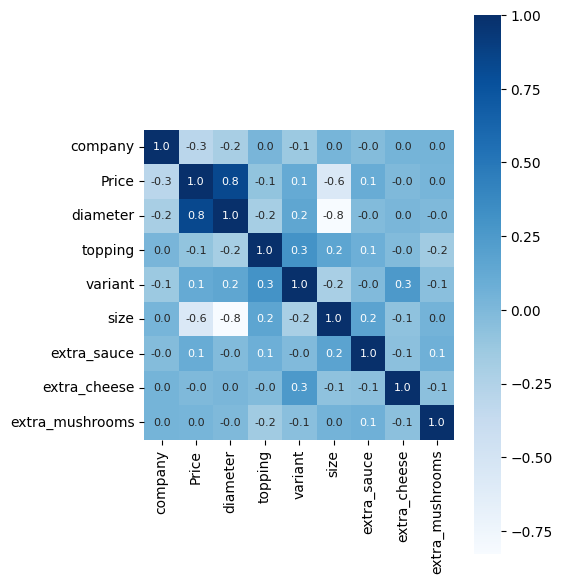

In [ ]:
#constructing a heat map to understand the correlation

plt.figure(figsize=(5,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Store the feature matrix in X and target in y

In [ ]:
X=df.drop('Price',axis=1)
y=df['Price']

Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Importing the models

In [ ]:
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [ ]:
!pip install scikit-learn==1.2.0


In [ ]:
import sklearn
print(sklearn.__version__) # To confirm the version

1.2.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Model Training

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

svm=SVR()
svm.fit(X_train,y_train)

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction

In [ ]:
lr_pred=lr.predict(X_test)
svm_pred=svm.predict(X_test)
gbr_pred=gbr.predict(X_test)
rfr_pred=rfr.predict(X_test)
xgb_pred=xgb.predict(X_test)

Evaluating the algorithm

In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(y_test,lr_pred)
score2 = metrics.r2_score(y_test,svm_pred)
score3 = metrics.r2_score(y_test,gbr_pred)
score4 = metrics.r2_score(y_test,rfr_pred)
score5 = metrics.r2_score(y_test,xgb_pred)

In [ ]:
print(score1,score2,score3,score4,score5)

0.6391199071772928 -0.05977151402032166 0.8109550116089352 0.7235449802095122 0.7305652447272124


In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVM','GBR','RFR','XGR'],'R2_SCORE':[score1,score2,score3,score4,score5]})

In [ ]:
final_data

,Models,R2_SCORE
0,LR,0.639120
1,SVM,-0.059772
2,GBR,0.810955
3,RFR,0.723545
4,XGR,0.730565


Feature Importance

<Axes: xlabel='Models', ylabel='R2_SCORE'>

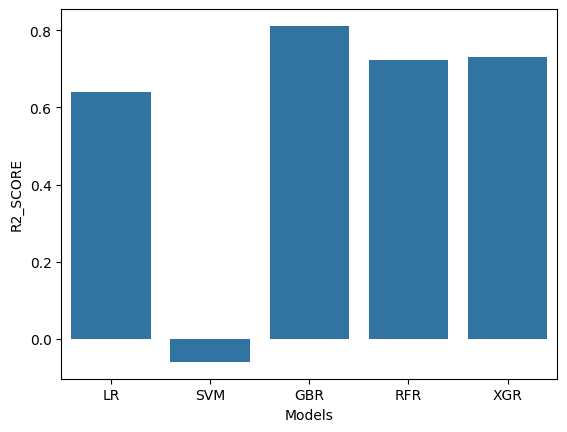

In [ ]:
sns.barplot(x='Models', y='R2_SCORE', data=final_data)


**Feature Importance**

Random Forest

In [ ]:
rfr.feature_importances_

array([0.01410971, 0.62742569, 0.02688131, 0.12490199, 0.175158  ,
       0.0146417 , 0.00984432, 0.00703727])

In [ ]:
fea=pd.Series(rfr.feature_importances_,index=X_train.columns)

In [ ]:
fea

,0
company,0.014110
diameter,0.627426
topping,0.026881
variant,0.124902
size,0.175158
extra_sauce,0.014642
extra_cheese,0.009844
extra_mushrooms,0.007037


<Axes: >

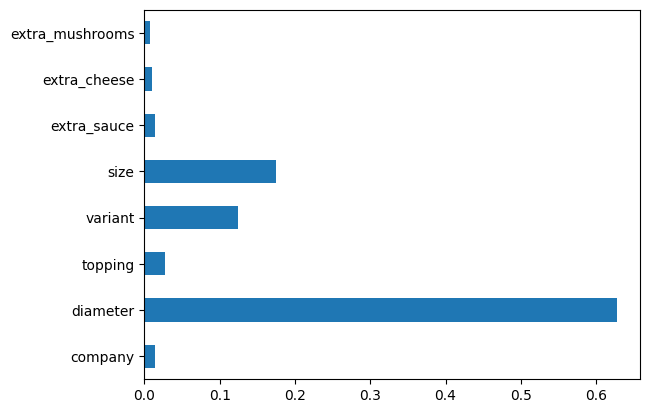

In [ ]:
fea.plot(kind='barh')

Gradient Boosting Regresssor

In [ ]:
gbr.feature_importances_

array([0.00698531, 0.65301316, 0.04629461, 0.11106719, 0.1523315 ,
       0.02369548, 0.00364879, 0.00296397])

In [ ]:
fea=pd.Series(gbr.feature_importances_,index=X_train.columns)

In [ ]:
fea

,0
company,0.006985
diameter,0.653013
topping,0.046295
variant,0.111067
size,0.152332
extra_sauce,0.023695
extra_cheese,0.003649
extra_mushrooms,0.002964


<Axes: >

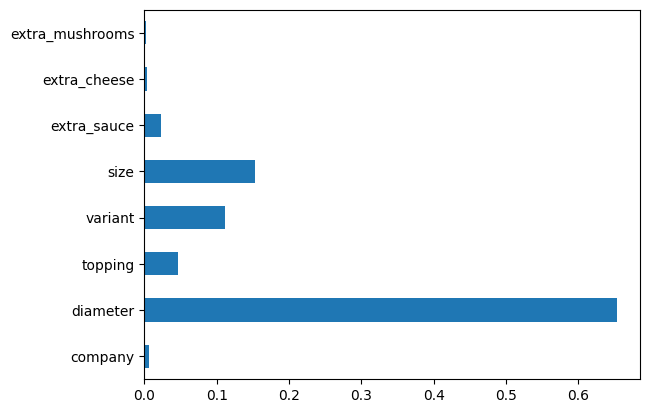

In [ ]:
fea.plot(kind='barh')

XGBRegressor

In [ ]:
xgb.feature_importances_

array([0.00406391, 0.43431172, 0.0092843 , 0.06968419, 0.4175416 ,
       0.05275905, 0.00907959, 0.00327562], dtype=float32)

In [ ]:
fea=pd.Series(xgb.feature_importances_,index=X_train.columns)

In [ ]:
fea

,0
company,0.004064
diameter,0.434312
topping,0.009284
variant,0.069684
size,0.417542
extra_sauce,0.052759
extra_cheese,0.009080
extra_mushrooms,0.003276


<Axes: >

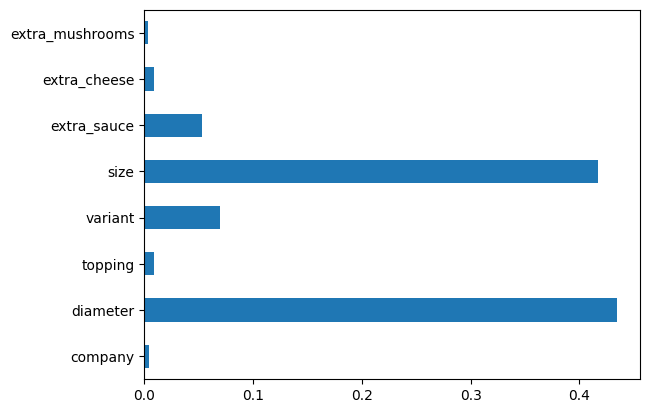

In [ ]:
fea.plot(kind='barh')

Gradient Boosting Regressor

In [ ]:
gbr.feature_importances_

array([0.00698531, 0.65301316, 0.04629461, 0.11106719, 0.1523315 ,
       0.02369548, 0.00364879, 0.00296397])

In [ ]:
fea=pd.Series(gbr.feature_importances_,index=X_train.columns)

In [ ]:
fea

,0
company,0.006985
diameter,0.653013
topping,0.046295
variant,0.111067
size,0.152332
extra_sauce,0.023695
extra_cheese,0.003649
extra_mushrooms,0.002964


<Axes: >

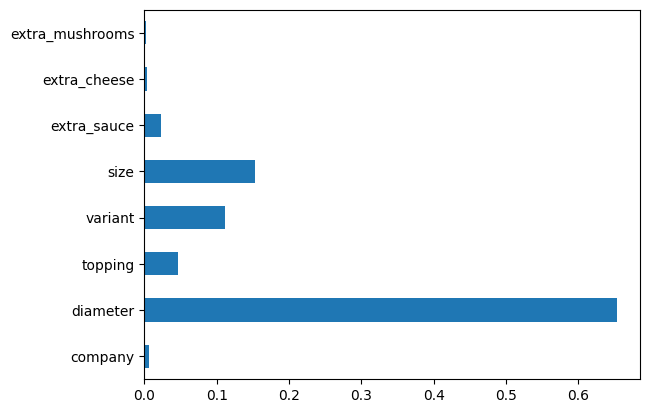

In [ ]:
fea.plot(kind='barh')

Save the model

In [ ]:
X=df.drop('Price',axis=1)
y=df['Price']

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

In [ ]:
import joblib

In [ ]:
joblib.dump(gbr,'pizza_price_predict')

['pizza_price_predict']

In [ ]:
model=joblib.load('pizza_price_predict')

In [ ]:
df=pd.DataFrame({'company':1,'diameter':22.0,'topping':2,'variant':8,'size':1,'extra_sauce':2,'extra_cheese':1,'extra_mushrooms':1},index=[0])

In [ ]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,2,1,1


In [ ]:
model.predict(df)

array([1253.61541651])